# Dados reais

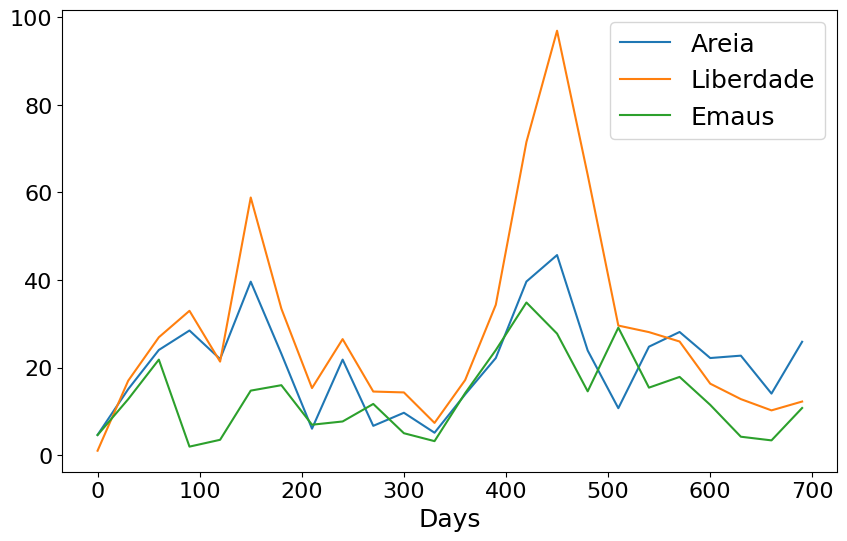

In [1]:

import matplotlib.pyplot as plt
days = [0,30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480,510,540,570,600,630,660,690]
emausOVT = [4.6173913043,12.811965812,21.8403361345,1.974789916,3.5333333333,14.7610619469,16,6.974137931,7.7179487179,11.7203389831,5.0344827586,3.2268907563,14.1964285714,24.0090909091,34.8813559322,27.7692307692,14.5982905983,29.1391304348,15.4406779661,17.8907563025,11.5084745763,4.2352941176,3.4,10.7943925234]
liberdadeOVT = [1.038961039,17.025,26.9401709402,32.9829059829,21.3833333333,58.8559322034,33.4705882353,15.3389830508,26.5210084034,14.55,14.35,7.3865546218,17.1764705882,34.3529411765,71.5338983051,96.9327731092,64.0084033613,29.6134453782,28.1186440678,25.9743589744,16.3474576271,12.8220338983,10.25,12.268907563]
areiaOVT = [4.6548672566,15.0956521739,24.0423728814,28.4871794872,21.9739130435,39.6379310345,23.1764705882,6.0672268908,21.8389830508,6.7192982456,9.7043478261,5.1465517241,13.9043478261,22.2,39.6666666667,45.7090909091,23.9203539823,10.7477477477,24.7913043478,28.1495327103,22.201754386,22.7456140351,14.0841121495,25.9137931034]
plt.figure(figsize=(10, 6))
plt.plot(days,areiaOVT,label='Areia')
plt.plot(days,liberdadeOVT,label='Liberdade')
plt.plot(days,emausOVT,label='Emaus')
plt.legend(fontsize=18)
plt.xlabel("Days", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()





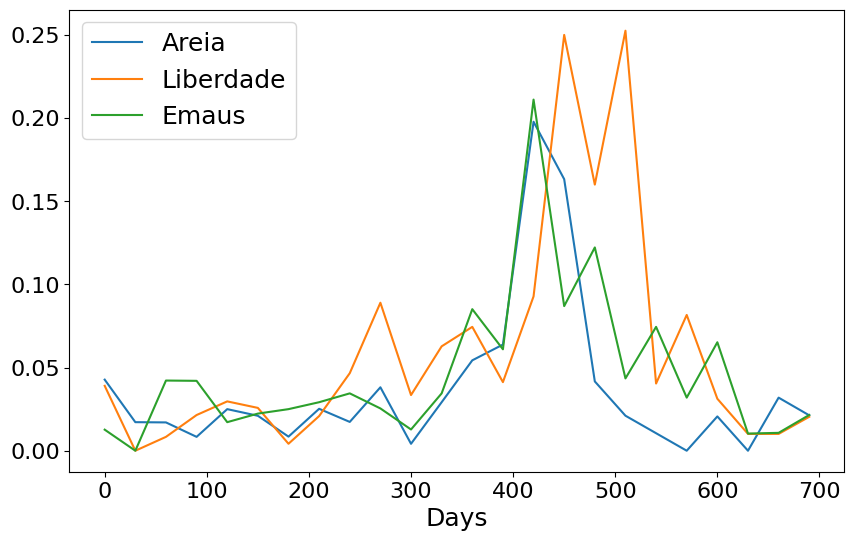

In [2]:
import matplotlib.pyplot as plt
days = [0,30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480,510,540,570,600,630,660,690]
emausADT = [0.0126582278,0,0.0421940928,0.0420168067,0.017167382,0.0223214286,0.025,0.0291666667,0.0344827586,0.0254237288,0.0127659574,0.0344827586,0.085106383,0.0609756098,0.2111111111,0.0869565217,0.1222222222,0.0434782609,0.0744680851,0.0319148936,0.0652173913,0.0103092784,0.0107526882,0.0215053763]
liberdadeADT = [0.0390243902,0,0.0083333333,0.0214592275,0.0296610169,0.025751073,0.0041841004,0.0208333333,0.0466101695,0.0889830508,0.0334728033,0.0627615063,0.0744680851,0.0412371134,0.0927835052,0.25,0.16,0.2525252525,0.0404040404,0.0816326531,0.03125,0.0101010101,0.0101010101,0.0204081633]
areiaADT = [0.0427350427,0.017167382,0.0170212766,0.0083333333,0.025,0.0210084034,0.0084745763,0.025210084,0.0173160173,0.0381355932,0.0041666667,0.0291666667,0.0543478261,0.0638297872,0.1978021978,0.1632653061,0.0416666667,0.0210526316,0.0105263158,0,0.0206185567,0,0.0319148936,0.0212765957]
plt.figure(figsize=(10, 6))
plt.plot(days,areiaADT,label='Areia')
plt.plot(days,liberdadeADT,label='Liberdade')
plt.plot(days,emausADT,label='Emaus')
plt.legend(fontsize=18)
plt.xlabel("Days", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Equilibrios dia a dia

## Proporções

### Funções de contagem de pixels:

In [3]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import math as m
COLORSmap = (
    (156, 192, 249), #water
    (250, 250, 250), #street
    (232, 234, 237), #house
    (253, 226, 147), #main street
    (168,218,181), #parks
    (254,247,224), #also houses
    (252,232,230), #also houses
)

def closest_color_map(rgb):
    r, g, b = rgb
    color_diffs = []
    for color in COLORSmap:
        cr, cg, cb = color
        color_diff = m.sqrt((r - cr)**2 + (g - cg)**2 + (b - cb)**2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]


def isGreen(rgb,mapColor):
    r, g, b = rgb
    if g>r and g>b: #green tone
        if closest_color_map(mapColor) != (156, 192, 249): #is not water
            return True
    return False

def getVectorFromRGBPoints(rgbPointsMap,rgbPointsSat):
    numPoints = len(rgbPointsMap)
    parks = 0
    streets = 0
    water = 0
    for pointSat,pointMap in zip(rgbPointsSat,rgbPointsMap):
        print(pointSat,pointMap)
        if closest_color_map(pointMap) in [(250, 250, 250),(253, 226, 147)]:
            #print(pointMap,'street')
            streets+=1
        elif isGreen(pointSat,pointMap):
            #print(pointMap,'park')
            parks+=1
        elif closest_color_map(pointMap) == (156, 192, 249):
            #print(pointMap,'water')
            water+=1
    houses = numPoints - parks - streets - water
    return [water,parks,streets,houses]#agua,parque, rua, casa

def getVectorFromRegion(mapC,mapS,region):

    dims = mapC.size
    xSize = dims[0]
    ySize = dims[1]

    rgbPointsMap = []
    rgbPointsSat = []
    polygon = Polygon(region)
    #get max x from region
    maxX = int(np.floor(max([x for x,y in region])))
    minX = int(np.floor(min([x for x,y in region])))
    maxY = int(np.ceil(max([y for x,y in region])))
    minY = int(np.ceil(min([y for x,y in region])))
    for x in range(minX,maxX):
        for y in range(minY,maxY):
            point = Point(x,y)
            if polygon.contains(point):
                rgbPointsMap.append(mapC.getpixel((x,y))[0:3])
                rgbPointsSat.append(mapS.getpixel((x,y))[0:3])

    return getVectorFromRGBPoints(rgbPointsMap,rgbPointsSat)


### Definição dos elementos:

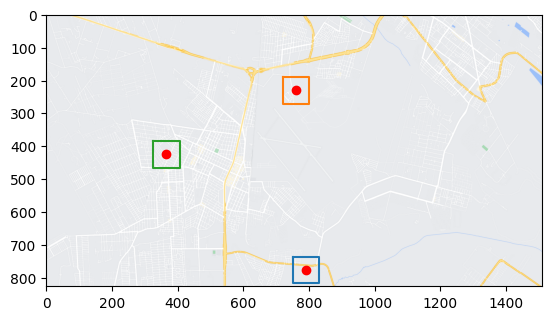

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#Atualizar tamanho aqui:
TAM = 40
#800x800m

mapC = Image.open("MapCropped.png")
mapS = Image.open("SatelCropped.png")
dims = mapC.size
xSize = dims[0]
ySize = dims[1]
points = [[792, 778],[760, 230], [366, 425]] #Emaus,Liberdade,Areia
regions = []
plt.imshow(mapC)
plt.scatter([a[0] for a in points],[a[1] for a in points],c='r') 
for p in points:
    region = [[p[0]-TAM,p[1]-TAM],[p[0]+TAM,p[1]-TAM],[p[0]+TAM,p[1]+TAM],[p[0]-TAM,p[1]+TAM]]
    xs = [
        a[0] for a in region] + [region[0][0]]
    ys = [a[1] for a in region] + [region[0][1]]
    plt.plot(xs,ys)
    regions.append(region)
plt.show()

### Contagem:

In [5]:
proportions = []
for r in regions:
    print(r)
    proportions.append(getVectorFromRegion(mapC,mapS,r))

[[752, 738], [832, 738], [832, 818], [752, 818]]
(117, 105, 79) (231, 232, 234)
(106, 93, 69) (232, 234, 237)
(134, 122, 98) (232, 234, 237)
(133, 121, 99) (232, 234, 237)
(105, 90, 71) (232, 234, 237)
(94, 79, 60) (232, 234, 237)
(109, 93, 76) (232, 234, 237)
(125, 109, 94) (232, 234, 237)
(126, 110, 95) (232, 234, 237)
(118, 101, 88) (232, 234, 237)
(120, 103, 91) (232, 234, 237)
(140, 122, 112) (232, 234, 237)
(163, 145, 133) (232, 234, 237)
(172, 151, 137) (232, 234, 237)
(176, 154, 138) (229, 230, 233)
(180, 157, 142) (255, 255, 255)
(175, 154, 138) (226, 227, 231)
(164, 145, 130) (232, 234, 237)
(155, 138, 122) (232, 234, 237)
(157, 141, 126) (239, 208, 137)
(168, 157, 139) (250, 191, 52)
(146, 137, 120) (253, 226, 147)
(136, 129, 111) (253, 226, 147)
(134, 128, 112) (250, 186, 41)
(131, 129, 112) (238, 212, 155)
(123, 122, 105) (232, 234, 237)
(119, 121, 103) (232, 234, 237)
(125, 127, 109) (232, 234, 237)
(128, 130, 112) (232, 234, 237)
(142, 144, 126) (232, 234, 237)
(144, 146

In [6]:
proportions

[[0, 1323, 647, 4271], [0, 3523, 404, 2314], [0, 43, 1481, 4717]]

In [7]:
proportions[0]  = proportions[0]/np.sum(proportions[0])
proportions[1]  = proportions[1]/np.sum(proportions[1])
proportions[2]  = proportions[2]/np.sum(proportions[2])
proportions #agua,parque,rua,casa

[array([0.        , 0.21198526, 0.10366928, 0.68434546]),
 array([0.        , 0.56449287, 0.06473322, 0.37077391]),
 array([0.        , 0.00688992, 0.23730171, 0.75580836])]

In [8]:

#Proporções (agua,parque, rua, casa):
emaus = proportions[0] #gerar esses valores por contagem
liberdade = proportions[1]
areia = proportions[2]
matProporcoes = np.matrix([emaus,liberdade,areia])




In [9]:
matProporcoes

matrix([[0.        , 0.21198526, 0.10366928, 0.68434546],
        [0.        , 0.56449287, 0.06473322, 0.37077391],
        [0.        , 0.00688992, 0.23730171, 0.75580836]])

In [10]:
from scipy import optimize
from scipy import stats

## Fase ovo

In [11]:
O_parque, O_rua, O_agua, O_casa = [],[],[],[]
for t in range(len(emausOVT)):
    vetOvo = [emausOVT[t],liberdadeOVT[t],areiaOVT[t]]
    def f(x):
        return np.linalg.norm(matProporcoes@x - vetOvo)
    result = optimize.minimize(f, [0,0,0,0], bounds=[(0,None),(0,None),(0,None),(0,None)])
    print(result.x,result.fun)
    O_agua.append(result.x[0])
    O_parque.append(result.x[1])
    O_rua.append(result.x[2])
    O_casa.append(result.x[3])

[0.         0.         0.61428224 5.8577055 ] 1.2957346665971279
[ 0.         21.52051586 47.5213546   4.85636143] 5.969959242075295e-09
[ 0.         32.46621044 59.43252835 12.85410805] 1.6080117241829048e-08
[ 0.         36.92108704 96.54701724  0.        ] 17.736988421097788
[ 0.        22.6655129 78.618621   0.       ] 10.536180551401634
[  0.          77.27694941 141.72547612   0.        ] 18.24265692133751
[ 0.         46.57951525 91.5552709   0.        ] 3.7637328683932147
[ 0.         24.02004094 24.0117874   0.        ] 0.6788457875207313
[ 0.         32.78630791 80.38120022  0.        ] 8.460166591141446
[ 0.         20.07353418  0.          9.57992311] 1.1715769979777508
[ 0.         19.38768675 36.3155722   0.        ] 3.1761783337913774
[ 0.         10.13887504 19.98727295  0.        ] 1.1120967501848873
[ 0.         20.64213797 23.74468512 10.75334837] 1.6173259500483828e-08
[ 0.         46.50158307 50.89622711 12.96869187] 8.288476291037299e-09
[  0.         105.92428768

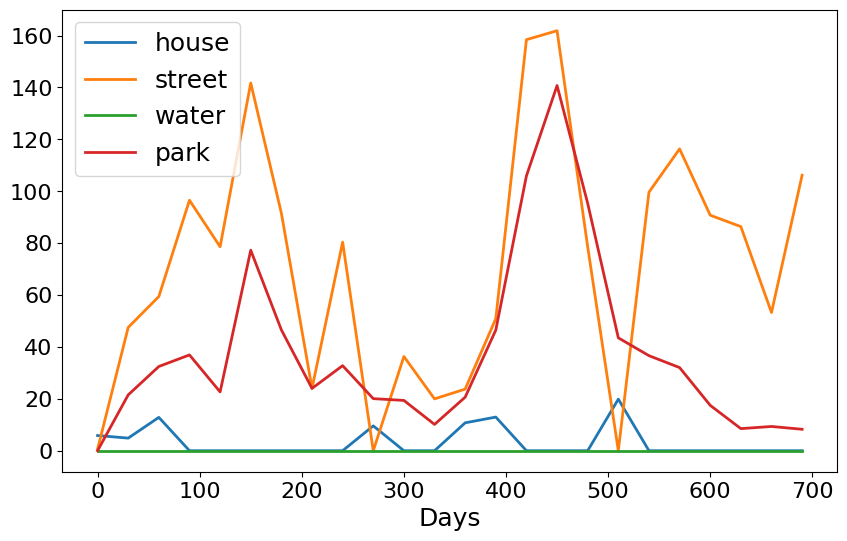

In [12]:
O_parque = np.array(O_parque)
O_rua = np.array(O_rua)
O_agua = np.array(O_agua)
O_casa = np.array(O_casa)

plt.figure(figsize=(10, 6))
plt.plot(days, O_casa, label="house", linewidth=2)
plt.plot(days, O_rua, label="street", linewidth=2)
plt.plot(days, O_agua, label="water", linewidth=2)
plt.plot(days, O_parque, label="park", linewidth=2)
plt.legend(fontsize=18)
plt.xlabel("Days", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


# Fase adulta

In [13]:
ADT_parque, ADT_rua, ADT_agua, ADT_casa = [],[],[],[]
for t in range(len(emausADT)):
    vetAdt = [emausADT[t],liberdadeADT[t],areiaADT[t]]
    def f(x):
        return np.linalg.norm(matProporcoes@x - vetAdt)
    result = optimize.minimize(f, [0,0,0,0], bounds=[(0,None),(0,None),(0,None),(0,None)])
    print(result.x,result.fun)
    ADT_agua.append(result.x[0])
    ADT_parque.append(result.x[1])
    ADT_rua.append(result.x[2])
    ADT_casa.append(result.x[3])

[0.         0.0422068  0.16057158 0.        ] 0.01446533201671644
[0.         0.         0.05717707 0.        ] 0.007860573122844964
[0.         0.00027879 0.         0.03800159] 0.020786133501899718
[0.         0.03128243 0.         0.02698296] 0.021805303947859248
[0.         0.03970793 0.10166722 0.        ] 0.0020016336359104463
[0.         0.02988601 0.0256267  0.01947747] 1.5163926580677024e-08
[0.         0.00024719 0.         0.02121935] 0.013436865696796592
[0.         0.01408266 0.0010325  0.03499092] 0.002654454511169269
[0.         0.06798406 0.         0.02508131] 0.003746191595003124
[0.         0.13154444 0.13379079 0.        ] 0.018263718328899406
[0.         0.05705121 0.01469771 0.        ] 0.0009525043995689003
[0.         0.09576242 0.1058412  0.00472377] 0.00020757193351727496
[0.         0.08541171 0.         0.08174463] 0.014252133565471514
[0.         0.01814427 0.00496519 0.08272802] 1.1068076869903702e-08
[0.         0.         0.         0.27898191] 0.0262992

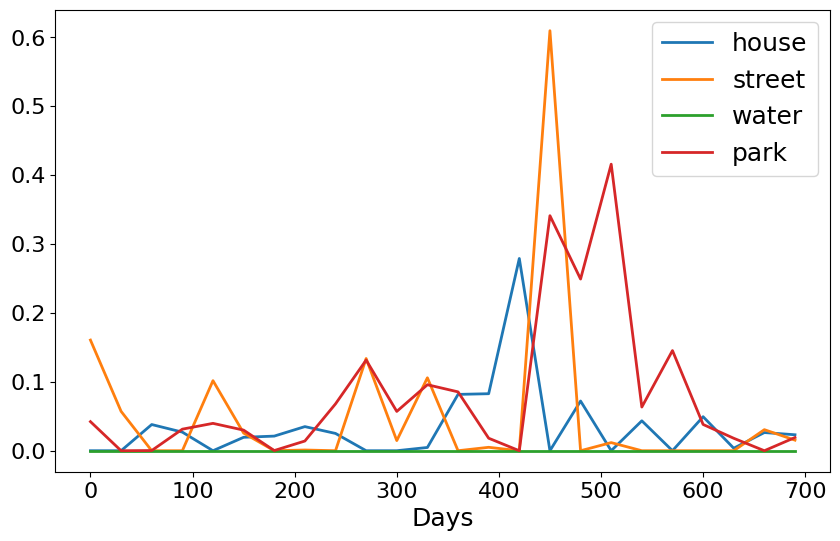

In [14]:

plt.figure(figsize=(10, 6))
plt.plot(days, ADT_casa, label="house", linewidth=2)
plt.plot(days, ADT_rua, label="street", linewidth=2)
plt.plot(days, ADT_agua, label="water", linewidth=2)
plt.plot(days, ADT_parque, label="park", linewidth=2)
plt.legend(fontsize=18)
plt.xlabel("Days", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


## Teste resultado

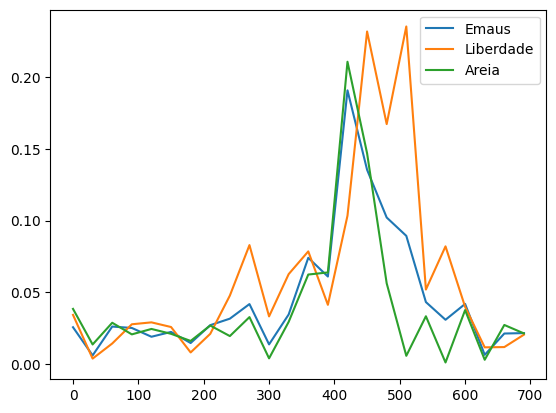

In [15]:
emausADTR = np.zeros(len(emausADT))
liberdadeADTR = np.zeros(len(emausADT))
areiaADTR =np.zeros(len(emausADT))
for t in range(len(emausADT)):
    R = matProporcoes@[ADT_agua[t],ADT_parque[t],ADT_rua[t],ADT_casa[t]]
    emausADTR[t],liberdadeADTR[t],areiaADTR[t] = R[0,0] , R[0,1], R[0,2]
plt.plot(days,emausADTR,label='Emaus')
plt.plot(days,liberdadeADTR,label='Liberdade')
plt.plot(days,areiaADTR,label='Areia')
plt.legend()
plt.show()

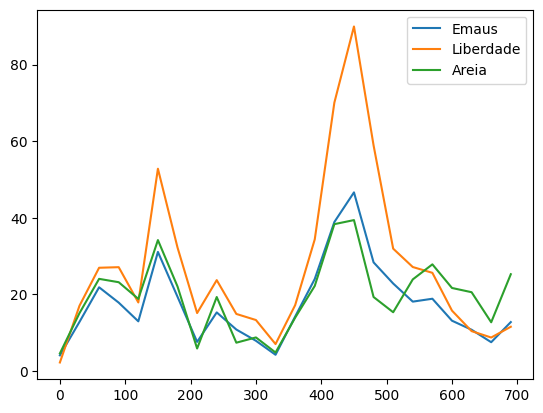

In [16]:
emausOR = np.zeros(len(emausOVT))
liberdadeOR = np.zeros(len(emausOVT))
areiaOR =np.zeros(len(emausOVT))
for t in range(len(emausOVT)):
    R = matProporcoes@[O_agua[t],O_parque[t],O_rua[t],O_casa[t]]
    emausOR[t],liberdadeOR[t],areiaOR[t] = R[0,0] , R[0,1], R[0,2]
plt.plot(days,emausOR,label='Emaus')
plt.plot(days,liberdadeOR,label='Liberdade')
plt.plot(days,areiaOR,label='Areia')
plt.legend()
plt.show()

In [17]:
from scipy.stats import pearsonr
print("OVT:")
print("Emaus:",pearsonr(emausOR,emausOVT)[0])
print("Liberdaee:",pearsonr(liberdadeOR,liberdadeOVT)[0])
print("Areia:",pearsonr(areiaOR,areiaOVT)[0])
print("ADT:")

print("Emaus:",pearsonr(emausADTR,emausADT)[0])
print("Liberdade:",pearsonr(liberdadeADTR,liberdadeADT)[0])
print("Areia:",pearsonr(areiaADTR,areiaADT)[0])

OVT:
Emaus: 0.802655699307474
Liberdaee: 0.996481503507417
Areia: 0.9829237605255896
ADT:
Emaus: 0.9127695075479866
Liberdade: 0.9964638297454063
Areia: 0.9802548860572282
